0. Importing libraries and loading the 'diamonds' dataset:

In [1]:
import pandas as pd
import seaborn as sb
import plotly.express as ex

In [141]:
df = sb.load_dataset('diamonds')

1. Preliminary analysis

In [142]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [144]:
df = df.drop_duplicates()

In [145]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [146]:
df.cut.value_counts()

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64

In [147]:
df.color.value_counts()

G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64

In [104]:
# Note: the most valuable color is 'D' and so on until letter 'Z' (the cheapest color)

In [148]:
df.clarity.value_counts()

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64

In [103]:
# Note: clarity classes of diamonds (from the best to the worst): IF - > VVS1 - > VVS2 - > VS1 - > VS2 - > SI1 - > SI2 - > I1 - > I2 - I3

In [149]:
df.agg({'price':'max', 'carat':'max'})

price    18823.00
carat        5.01
dtype: float64

2. Correlation analysis

In [150]:
df.corr()

C:\Users\97253\AppData\Local\Temp\ipykernel_96356\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


C:\Users\97253\AppData\Local\Temp\ipykernel_96356\3442138956.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

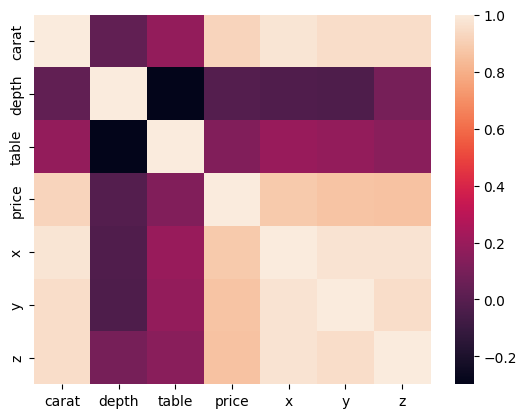

In [151]:
sb.heatmap(df.corr())

It's obvious that parameter 'carat' depends on the size of a diamond (the 'x','y','z' parameters) and price shows positive correlation with 'carat'.  

3. Visualizations

In [105]:
# 1. 'Color' and types of 'cut' of the diamonds in the dataset observed

<AxesSubplot: xlabel='cut', ylabel='Count'>

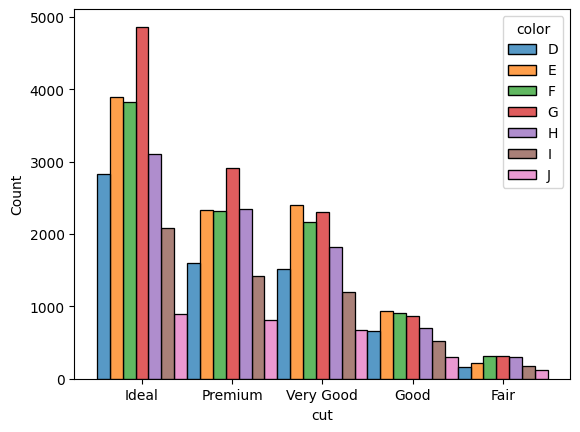

In [152]:
sb.histplot(data=df, x = 'cut', hue='color', multiple = 'dodge')

Conclusions:
1. most diamonds have a cut type 'Ideal', then goes type 'Premium', then 'Very good', then 'Good' and lastly 'Fair'.
2. most diamonds have colors: G, E, F and the rarest colors are J and I.

In [86]:
# 2. Influence of 'carat', 'clarity' and 'cut' parameters on the price

<AxesSubplot: xlabel='carat', ylabel='price'>

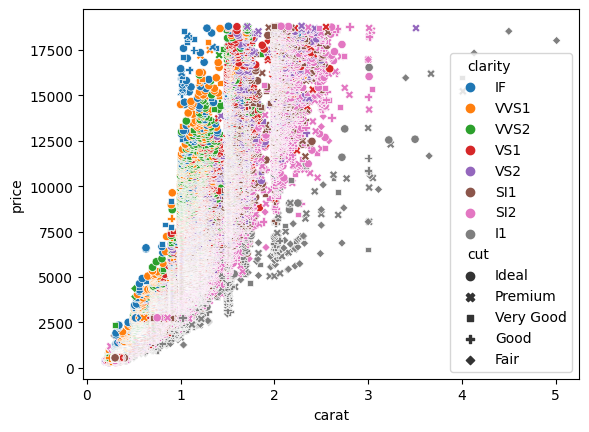

In [153]:
sb.scatterplot(data = df, x = df.carat, y = df.price, hue='clarity', style='cut')

Conclusions: 
1. up to approximately 2.5 carat, price shows positive correlation with carats and with clarity (IF, VVS1 and VVS2 - the highest possible clarity). 
2. for diamonds of 2.5 carat and more (up to the highest of 5.01 carat), price almost doesn't change, but only the lowest clarity is available (SI2 and I1).
3. no influence of 'cut' parameter on price is observed

In [91]:
# 3. Influence of the 'color' parameter on the price

In [2]:
ex.scatter(data_frame=df, x='carat', y='price', color='color')

NameError: name 'df' is not defined

<AxesSubplot: xlabel='price', ylabel='Density'>

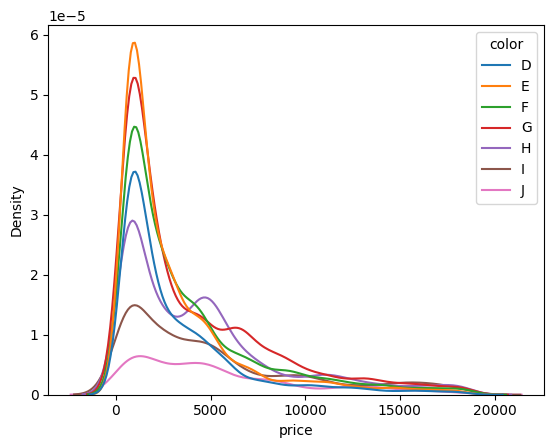

In [155]:
sb.kdeplot(data=df, x= 'price', hue = 'color')

Conclusions: 
1. up to approximately 3 carat diamonds, no correlation between color and price is detected.  
2. big diamonds of 3 carat and more (up to the higest 5.01 carat) cost more then 10K and have the most rare colors: I, J and H.
3. in the low price segment (up to price 5K) the biggest quantity of diamonds have color E or G (which also prevalate in the dataset observed) 

## Tasks

1 .מה מחיר היהלום הגבוהה ביותר?

In [156]:
df.price.max()

18823

2 .מה המחיר הממוצע של יהלום?

In [157]:
df.price.mean()

3933.065081607614

3 .כמה יהלומים מסוג Ideal קיימים?

In [158]:
df.cut.value_counts()['Ideal']

21488

4 .כמה צבעים שונים יש ליהלומים? מהם?

In [159]:
df.color.unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

5 .מה החציון קאראט של יהלומים מסוג Premium?

In [160]:
df[df['cut'] == 'Premium'].carat.median()

0.86

6 .צרו ממוצע carat לכל סוג cut.

In [161]:
df.groupby('cut').carat.mean()

cut
Ideal        0.703472
Premium      0.891620
Very Good    0.806195
Good         0.847215
Fair         1.043736
Name: carat, dtype: float64

7 .צרו ממוצע מחיר לכל סוג צבע.

In [163]:
df.groupby('color').price.mean()

color
D    3174.441007
E    3079.608020
F    3726.749580
G    4001.352069
H    4482.855174
I    5081.751248
J    5326.415418
Name: price, dtype: float64